In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy.optimize import curve_fit
import statistics
from scipy import asarray as ar,exp

In [2]:
#Ba-133_nFZ
Bn = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Ba-133_nFZ2_V150_test.txt", skiprows = 0, unpack = True)
#Ba-133_pFZ
Bp = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Ba-133_pFZ_V150_test.txt", skiprows = 0, unpack = True)
#Ba-133_nMCz
BnC = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Ba-133_nMCz_V150_test.txt", skiprows = 0, unpack = True)
#noise nFz
Bbn = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/noise-bkg_nFZ2_V150_test.txt", skiprows = 0, unpack = True)
#noise pFz
Bbp = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/noise-bkg_pFZ_V150_test.txt", skiprows = 0, unpack = True)
#noise nMCZ
BbnC= np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/noise-bkg_nMCz_V150_test.txt", skiprows = 0, unpack = True)

mu_left= 186.65811768346342 , Standardfehler= 0.17034408965746756
sig_left= 25.37860660972243 , Standardfehler= 0.21391979333403868
mu_right= 464.4879275530797 , Standardfehler= 1.1281091807647072
sig_right= 29.711452181228072 , Standardfehler= 1.8326947964567346
59.76205155952932


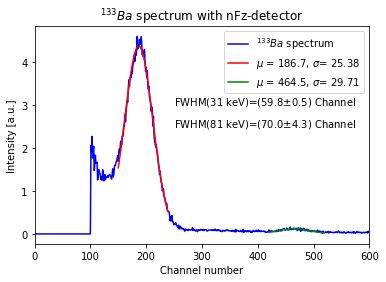

In [37]:
x1=ar(range(1024))
#Ba-133_nFZ minus background noise
A=Bbn/300.005000
Ax= Bn/300.156000
Bnr=Ax-A
def gaussian(x,A,mu, sig):
    return (A/(np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sig**2)))

popt,pcov = curve_fit(gaussian,x1[150:230],Bnr[150:230],p0=[5,190,1])
popt1,pcov1 = curve_fit(gaussian,x1[430:500],Bnr[430:500],p0=[1,470,1])
print("mu_left=",popt[1],", Standardfehler=", np.sqrt(pcov[1][1]))
print("sig_left=",popt[2],", Standardfehler=", np.sqrt(pcov[2][2]))
print("mu_right=",popt1[1],", Standardfehler=", np.sqrt(pcov1[1][1]))
print("sig_right=",popt1[2],", Standardfehler=", np.sqrt(pcov1[2][2]))
x_k=np.arange(150,240)
x_k1=np.arange(420,520)
plt.xlim(0,600)
plt.plot(x1,Bnr, 'b-', label=r'$^{133}Ba$ spectrum')
plt.plot(x_k,gaussian(x_k,*popt),'r',label=r'$\mu$ = {:1.4}, $\sigma$= {:1.4}'.format(popt[1],popt[2]))
plt.plot(x_k1,gaussian(x_k1,*popt1),'g',label=r'$\mu$ = {:1.4}, $\sigma$= {:1.4}'.format(popt1[1],popt1[2]))
plt.xlabel('Channel number')
plt.ylabel('Intensity [a.u.]')
plt.title(r'$^{133}Ba$ spectrum with nFz-detector')
plt.legend(loc='best')
sig=popt[2]
sig_err = np.sqrt(pcov[2][2])
FWHM= 2*np.sqrt(2*np.log(2))*sig
FWHM_err= 2*np.sqrt(2*np.log(2))*sig_err
sig1=popt1[2]
sig_err1 = np.sqrt(pcov1[2][2])
FWHM1= 2*np.sqrt(2*np.log(2))*sig1
FWHM_err1= 2*np.sqrt(2*np.log(2))*sig_err1
plt.text(x=250, y=3,s=r'FWHM(31 keV)=({:1.3}$\pm${:1.2}) Channel'. format(FWHM,FWHM_err))
plt.text(x=250, y=2.5,s=r'FWHM(81 keV)=({:1.3}$\pm${:1.2}) Channel'. format(FWHM1,FWHM_err1))
print(FWHM)
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Ba_nFz.pdf', format='pdf')
plt.show()

mu_left= 205.68179416290113 , Standardfehler= 0.2591635378885734
sig_left= 22.46324376790928 , Standardfehler= 0.44985261243800734
mu_right= 498.9010974367622 , Standardfehler= 1.0173800320576534
sig_right= 24.518189264220588 , Standardfehler= 1.5931043048181852
52.89689670108932


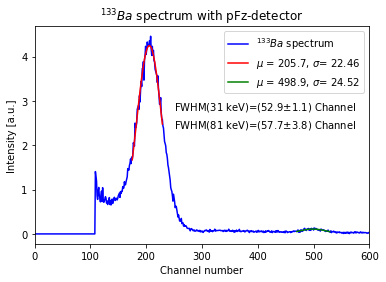

In [38]:
#Ba133-pFz minus background noise
B=Bbp/300.004000
Bx=Bp/300.145000
Bpr=Bx-B
def gaussian(x,A,mu, sig):
    return (A/(np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sig**2)))

popt2,pcov2 = curve_fit(gaussian,x1[180:225],Bpr[180:225],p0=[5,205,1])
popt21,pcov21 = curve_fit(gaussian,x1[470:530],Bpr[470:530],p0=[0.125,500,1])
print("mu_left=",popt2[1],", Standardfehler=", np.sqrt(pcov2[1][1]))
print("sig_left=",popt2[2],", Standardfehler=", np.sqrt(pcov2[2][2]))
print("mu_right=",popt21[1],", Standardfehler=", np.sqrt(pcov21[1][1]))
print("sig_right=",popt21[2],", Standardfehler=", np.sqrt(pcov21[2][2]))
x_k2=np.arange(175,230)
x_k21=np.arange(470,530)
plt.xlim(0,600)
plt.plot(x1,Bpr, 'b-', label=r'$^{133}Ba$ spectrum')
plt.plot(x_k2,gaussian(x_k2,*popt2),'r',label=r'$\mu$ = {:1.4}, $\sigma$= {:1.4}'.format(popt2[1],popt2[2]))
plt.plot(x_k21,gaussian(x_k21,*popt21),'g',label=r'$\mu$ = {:1.4}, $\sigma$= {:1.4}'.format(popt21[1],popt21[2]))
plt.xlabel('Channel number')
plt.ylabel('Intensity [a.u.]')
plt.title(r'$^{133}Ba$ spectrum with pFz-detector')
plt.legend(loc='best')
sig2=popt2[2]
sig_err2 = np.sqrt(pcov2[2][2])
FWHM2= 2*np.sqrt(2*np.log(2))*sig2
FWHM_err2= 2*np.sqrt(2*np.log(2))*sig_err2
sig21=popt21[2]
sig_err21 = np.sqrt(pcov21[2][2])
FWHM21= 2*np.sqrt(2*np.log(2))*sig21
FWHM_err21= 2*np.sqrt(2*np.log(2))*sig_err21
plt.text(x=250, y=2.8,s=r'FWHM(31 keV)=({:1.3}$\pm${:1.2}) Channel'. format(FWHM2,FWHM_err2))
plt.text(x=250, y=2.4,s=r'FWHM(81 keV)=({:1.3}$\pm${:1.2}) Channel'. format(FWHM21,FWHM_err21))
print(FWHM2)
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Ba_pFz.pdf', format='pdf')
plt.show()

mu_left= 102.5012127958289 , Standardfehler= 0.6628616540880112
sig_left= 20.99741317919992 , Standardfehler= 1.0485809044628567


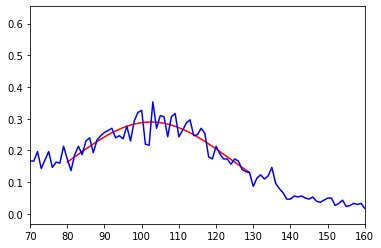

In [24]:
#Ba133-nMCZ minus background noise
C=BbnC/155.215000
Cx=BnC/300.009000
BnCr=Cx-C
def gaussian(x,A,mu, sig):
    return (A/(np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sig**2)))

popt3,pcov3 = curve_fit(gaussian,x1[80:130],Cx[80:130],p0=[0.3,105,1])
print("mu_left=",popt3[1],", Standardfehler=", np.sqrt(pcov3[1][1]))
print("sig_left=",popt3[2],", Standardfehler=", np.sqrt(pcov3[2][2]))
x_k3=np.arange(80,130)
plt.xlim(70,160)
plt.plot(x_k3,gaussian(x_k3,*popt3),'r',label='fit')
#plt.plot(x_k31,gaussian(x_k31,*popt31),'g',label='fit')
plt.plot(x1,Cx, 'b-', label='Ba-133-nMCZ')
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Ba_nMCz.pdf', format='pdf')
plt.show()